In [24]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t

folder_path = './4servers_json/'


In [25]:
def get_jsons(folder_path):
    # create a list to store the (file_name, data) tuples
    json_data = []
    
    # loop through all the files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.json'):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r') as f:
                data = pd.read_json(f)
                json_data.append((file_name, data))
                
    return json_data



In [26]:
def JobAvgTimeSys(json_data):
    # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticSink' and name == 'lifeTime:mean':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticSink' and name == 'lifeTime:mean':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic


In [27]:
def JobMinTimeSys(json_data):
     # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticSink' and name == 'lifeTime:min':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticSink' and name == 'lifeTime:min':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic

In [28]:
def JobMaxTimeSys(json_data):
    # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticSink' and name == 'lifeTime:max':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticSink' and name == 'lifeTime:max':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic

In [29]:
def PointEstConfInt(df_list1,df_list2):
    # compute the point estimate and confidence interval for the mean of each module
    df = pd.concat(df_list1, ignore_index=True)
    df2 = pd.concat(df_list2, ignore_index=True)

    elastic_points = {}
    inelastic_points = {}
    

    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        variance = values.var()
        se = np.sqrt(variance) / np.sqrt(n)
        alpha = 0.05  # 95% confidence interval
        dof = n - 1  # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        elastic_points[filename] = point_estimate
        print(
            f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f}), variance = {variance:.5f}'
        )

    for filename in df['filename'].unique():
        module = df2.iloc[0]['module']
        values = df2.loc[df2['filename'] == filename, 'value']
        name = df2.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        variance = values.var()
        se = np.sqrt(variance) / np.sqrt(n)
        alpha = 0.05  # 95% confidence interval
        dof = n - 1  # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        inelastic_points[filename] = point_estimate
        print(
            f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f}), variance = {variance:.5f}'
        )
    return elastic_points, inelastic_points

In [30]:
def plotAvgTime(elastic_points, inelastic_points):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    elastic = dict(sorted(elastic_points.items(), key=lambda x: x[1])[:3])
    inelastic = dict(sorted(inelastic_points.items(), key=lambda x: x[1])[:3])
    
    
    ax1.barh(list(elastic.keys()), list(elastic.values()), color='blue')
    ax1.set_xlabel('Average Time in System ')
    ax1.set_title('Elastic Job')
        
    ax2.barh(list(inelastic.keys()), list(inelastic.values()), color='red')
    ax2.set_xlabel('Average Time in System ')
    ax2.set_title('Inelastic Job')

    plt.tight_layout()
    plt.show()

In [31]:
def plotMaxTime(elastic_points, inelastic_points):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    elastic = dict(sorted(elastic_points.items(), key=lambda x: x[1])[:3])
    inelastic = dict(sorted(inelastic_points.items(), key=lambda x: x[1])[:3])
    
    
    ax1.barh(list(elastic.keys()), list(elastic.values()), color='blue')
    ax1.set_xlabel('Max Time in System ')
    ax1.set_title('Elastic Job')
        
    ax2.barh(list(inelastic.keys()), list(inelastic.values()), color='red')
    ax2.set_xlabel('Max Time in System ')
    ax2.set_title('Inelastic Job')

    plt.tight_layout()
    plt.show()

In [32]:
def plotMinTime(elastic_points, inelastic_points):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    elastic = dict(sorted(elastic_points.items(), key=lambda x: x[1])[:3])
    inelastic = dict(sorted(inelastic_points.items(), key=lambda x: x[1])[:3])
    
    
    ax1.barh(list(elastic.keys()), list(elastic.values()), color='blue')
    ax1.set_xlabel('Min Time in System ',)
    ax1.set_title('Elastic Job')
        
    ax2.barh(list(inelastic.keys()), list(inelastic.values()), color='red')
    ax2.set_xlabel('Min Time in System ')
    ax2.set_title('Inelastic Job')

    plt.tight_layout()
    
    plt.show()

In [33]:
def QueueJobsDropped(json_data):
   # create an empty list to store the results
    dfs_elastic = []
    dfs_inelastic = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
                # check if the scalar is for the module Rete.ElasticSink
                if module == 'Rete.ElasticQueue' and name == 'dropped:count':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_elastic.append(df1)
                    
                   
                # check if the scalar is for the module Rete.InleasticSink
                elif module == 'Rete.InelasticQueue' and name == 'dropped:count':
                    df2 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_inelastic.append(df2)
   
    return dfs_elastic,dfs_inelastic

In [34]:
def AvgDroppedJobs(df_list1,df_list2):

    df = pd.concat(df_list1, ignore_index=True)
    df2 = pd.concat(df_list2, ignore_index=True)
    averages1 = {}
    averages2 = {}

    print('---------- Dropped jobs in Elastic Queue ---------- \n')
    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        se = values.std() / (n ** 0.5)
        alpha = 0.05 # 95% confidence interval
        dof = n - 1 # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        averages1[filename] = point_estimate
        print(f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f})')

    print('---------- Dropped jobs in Inelastic Queue ---------- \n')
    for filename in df2['filename'].unique():
        module = df2.iloc[0]['module']
        values = df2.loc[df2['filename'] == filename, 'value']
        name = df2.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        se = values.std() / (n ** 0.5)
        alpha = 0.05 # 95% confidence interval
        dof = n - 1 # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        averages2[filename] = point_estimate
        print(f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f})')

    return averages1,averages2



In [35]:
def plotDropped(elastic, inelastic):
    # Figure 1
    fig1, ax1 = plt.subplots(figsize=(10, 15))

    words = ['General-','.json']

    elastic = {remove_words_from_key(k,words): v for k, v in elastic.items() if v > 0}
    elastic_sorted = sorted(elastic.items(), key=lambda x: x[1], reverse=True)
    keys_elastic, values_elastic = zip(*elastic_sorted)

    ax1.barh(keys_elastic, values_elastic, color='blue')
    ax1.set_xlabel('Average Dropped Jobs')
    ax1.set_title('Elastic Queue')

    # Figure 2
    fig2, ax2 = plt.subplots(figsize=(10, 20))

    inelastic = {remove_words_from_key(k,words): v for k, v in inelastic.items() if v > 0}
    inelastic_sorted = sorted(inelastic.items(), key=lambda x: x[1], reverse=True)
    keys_inelastic, values_inelastic = zip(*inelastic_sorted)

    ax2.barh(keys_inelastic, values_inelastic, color='green')
    ax2.set_xlabel('Average Dropped Jobs')
    ax2.set_title('Inelastic Queue')

    plt.show()

def remove_words_from_key(key,words):
    for word in words:
        key = key.replace(word, '')
    return key

In [36]:
def UseFact(json_data):
     # create an empty list to store the results
    dfs_server0 = []
    #dfs_server1 = []
    #dfs_server2 = []
    #dfs_server3 = []
    # loop through the keys of the JSON data dictionary
    for filename,data in json_data:
        # create an empty DataFrame for the current file
        df = pd.DataFrame(columns=['filename','module', 'name', 'value'])
      
        for key in data:
            # extract the scalars for the current General
            scalars = data[key]['scalars']
                
                # loop through the scalars and append them to the DataFrame
            for scalar in scalars:
                module = scalar['module']
                name = scalar['name']
                value = scalar['value']
                #df1 = pd.concat([df,pd.DataFrame.from_records([{'General': key, 'module': module, 'name': name, 'value': value}])], ignore_index=True)
                
                #results.append((filename, df1))
    
               
                if module == 'Rete.server' and name == 'busy:timeavg':
                    df1 = pd.concat([df,pd.DataFrame.from_records([{'filename':filename,'module': module, 'name': name, 'value': value}])], ignore_index=True)
                    dfs_server0.append(df1)
                
   
    return dfs_server0#,dfs_server1,dfs_server2,dfs_server3
    

In [37]:
def PointEstConfIntUseFact4(df_list1):
    # compute the point estimate and confidence interval for the mean of each module
    df = pd.concat(df_list1, ignore_index=True)
    #df2 = pd.concat(df_list2, ignore_index=True)
    #df3 = pd.concat(df_list3, ignore_index=True)
    #df4 = pd.concat(df_list4, ignore_index=True)

    server0 = {}
    #server1 = {}
    #server2 = {}
    #server3 = {}
    

    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        variance = values.var()
        se = np.sqrt(variance) / np.sqrt(n)
        alpha = 0.05  # 95% confidence interval
        dof = n - 1  # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        server0[filename] = point_estimate
        print(
            f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f}), variance = {variance:.5f}'
        )

    
    return server0


In [38]:
def PointEstConfIntUseFact(df_list1,df_list2):
    # compute the point estimate and confidence interval for the mean of each module
    df = pd.concat(df_list1, ignore_index=True)
    df2 = pd.concat(df_list2, ignore_index=True)
    

    for filename in df['filename'].unique():
        module = df.iloc[0]['module']
        values = df.loc[df['filename'] == filename, 'value']
        name = df.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        se = values.std() / (n ** 0.5)
        alpha = 0.05 # 95% confidence interval
        dof = n - 1 # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        print(f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f})')


    for filename in df2['filename'].unique():
        module = df2.iloc[0]['module']
        values = df2.loc[df2['filename'] == filename, 'value']
        name = df2.iloc[0]['name']
        n = len(values)
        mean = values.mean()
        se = values.std() / (n ** 0.5)
        alpha = 0.05 # 95% confidence interval
        dof = n - 1 # degrees of freedom
        interval = t.interval(alpha, dof, loc=mean, scale=se)
        point_estimate = mean
        lower_ci = interval[0]
        upper_ci = interval[1]
        print(f'{filename}|{module}|{name}: point estimate = {point_estimate:.5f}, 95% CI = ({lower_ci:.5f}, {upper_ci:.5f})')


In [39]:
def plotFactUse(server0):
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))  
      
    server_0 = dict(sorted(server0.items(), key=lambda x: x[1])[:3])
    #server_1= dict(sorted(server1.items(), key=lambda x: x[1])[:3])
    #server_2 = dict(sorted(server2.items(), key=lambda x: x[1])[:3])
    #server_3 = dict(sorted(server3.items(), key=lambda x: x[1])[:3])
    
    
    ax1.barh(list(server_0.keys()), list(server_0.values()), color='blue')
    ax1.set_xlabel('busy average time')
    ax1.set_title('server 0')
        
   

    plt.tight_layout()
    
    plt.show()

In [40]:
json_data = get_jsons(folder_path)

General-0.5s,0.5s,-1,-1.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.59291, 95% CI = (0.59280, 0.59301), variance = 0.00006
General-0.5s,0.5s,-1,4.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.58277, 95% CI = (0.58265, 0.58288), variance = 0.00006
General-0.5s,0.5s,-1,6.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.58950, 95% CI = (0.58942, 0.58959), variance = 0.00004
General-0.5s,0.5s,4,-1.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.59003, 95% CI = (0.58997, 0.59010), variance = 0.00002
General-0.5s,0.5s,4,4.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.57865, 95% CI = (0.57855, 0.57875), variance = 0.00005
General-0.5s,0.5s,4,6.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.58871, 95% CI = (0.58862, 0.58880), variance = 0.00004
General-0.5s,0.5s,6,-1.json|Rete.ElasticSink|lifeTime:mean: point estimate = 0.59441, 95% CI = (0.59434, 0.59448), variance = 0.00002
General-0.5s,0.5s,6,4.json|Rete.ElasticSink|lifeTime:mean: poin

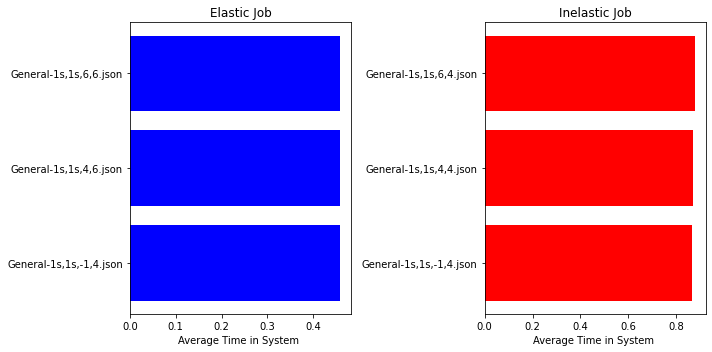

In [46]:
df1,df2 = JobAvgTimeSys(json_data)
p1, p2 = PointEstConfInt(df1,df2)
plotAvgTime(p1,p2)

General-0.5s,0.5s,-1,-1.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25480, 95% CI = (0.25476, 0.25483), variance = 0.00001
General-0.5s,0.5s,-1,4.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25113, 95% CI = (0.25111, 0.25115), variance = 0.00000
General-0.5s,0.5s,-1,6.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25235, 95% CI = (0.25233, 0.25237), variance = 0.00000
General-0.5s,0.5s,4,-1.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25602, 95% CI = (0.25598, 0.25607), variance = 0.00001
General-0.5s,0.5s,4,4.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25130, 95% CI = (0.25128, 0.25132), variance = 0.00000
General-0.5s,0.5s,4,6.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25370, 95% CI = (0.25366, 0.25374), variance = 0.00001
General-0.5s,0.5s,6,-1.json|Rete.ElasticSink|lifeTime:min: point estimate = 0.25588, 95% CI = (0.25583, 0.25593), variance = 0.00001
General-0.5s,0.5s,6,4.json|Rete.ElasticSink|lifeTime:min: point estima

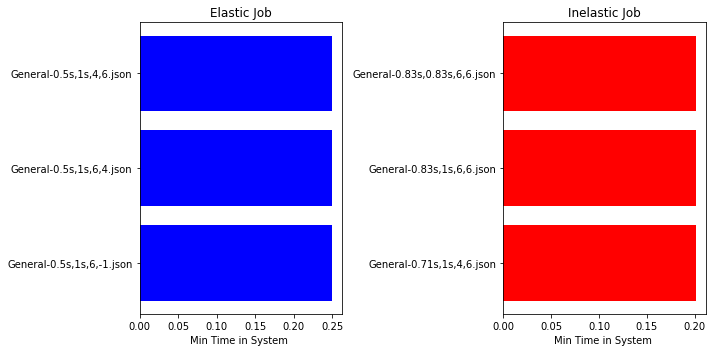

In [42]:
df1,df2 = JobMinTimeSys(json_data)
p1,p2 = PointEstConfInt(df1,df2)
plotMinTime(p1,p2)

General-0.5s,0.5s,-1,-1.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.15763, 95% CI = (1.15720, 1.15806), variance = 0.00091
General-0.5s,0.5s,-1,4.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.18969, 95% CI = (1.18887, 1.19052), variance = 0.00339
General-0.5s,0.5s,-1,6.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.21249, 95% CI = (1.21133, 1.21365), variance = 0.00668
General-0.5s,0.5s,4,-1.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.19479, 95% CI = (1.19409, 1.19549), variance = 0.00243
General-0.5s,0.5s,4,4.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.19961, 95% CI = (1.19901, 1.20020), variance = 0.00175
General-0.5s,0.5s,4,6.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.18357, 95% CI = (1.18321, 1.18393), variance = 0.00064
General-0.5s,0.5s,6,-1.json|Rete.ElasticSink|lifeTime:max: point estimate = 1.18070, 95% CI = (1.18024, 1.18116), variance = 0.00106
General-0.5s,0.5s,6,4.json|Rete.ElasticSink|lifeTime:max: point estima

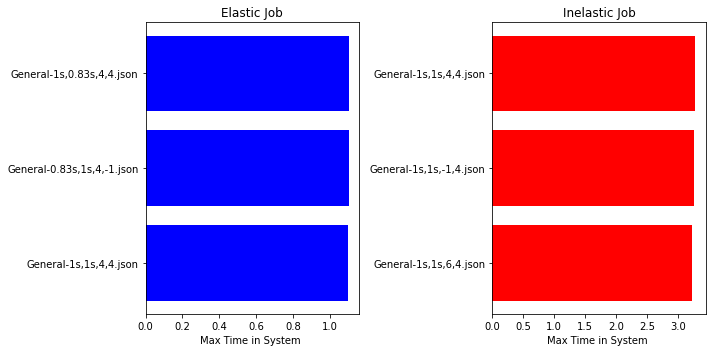

In [43]:
df1,df2 = JobMaxTimeSys(json_data)
p1, p2 = PointEstConfInt(df1,df2)
plotMaxTime(p1,p2)

---------- Dropped jobs in Elastic Queue ---------- 

General-0.5s,0.5s,-1,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.5s,0.5s,-1,4.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.5s,0.5s,-1,6.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.5s,0.5s,4,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 13.20000, 95% CI = (13.15001, 13.24999)
General-0.5s,0.5s,4,4.json|Rete.ElasticQueue|dropped:count: point estimate = 13.25000, 95% CI = (13.19208, 13.30792)
General-0.5s,0.5s,4,6.json|Rete.ElasticQueue|dropped:count: point estimate = 15.65000, 95% CI = (15.60315, 15.69685)
General-0.5s,0.5s,6,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 0.70000, 95% CI = (0.68688, 0.71312)
General-0.5s,0.5s,6,4.json|Rete.ElasticQueue|dropped:count: point estimate = 0.30000, 95% CI = (0.29188, 0.30812)
General-0.5s,0.5s,6,6.json|Rete.ElasticQueu

c:\Users\Giuseppe Caputo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\Giuseppe Caputo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


General-0.71s,0.71s,4,4.json|Rete.ElasticQueue|dropped:count: point estimate = 2.35000, 95% CI = (2.32924, 2.37076)
General-0.71s,0.71s,4,6.json|Rete.ElasticQueue|dropped:count: point estimate = 2.65000, 95% CI = (2.62729, 2.67271)
General-0.71s,0.71s,6,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.71s,0.71s,6,4.json|Rete.ElasticQueue|dropped:count: point estimate = 0.10000, 95% CI = (0.09563, 0.10437)
General-0.71s,0.71s,6,6.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.71s,0.83s,-1,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.71s,0.83s,-1,4.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.71s,0.83s,-1,6.json|Rete.ElasticQueue|dropped:count: point estimate = 0.00000, 95% CI = (nan, nan)
General-0.71s,0.83s,4,-1.json|Rete.ElasticQueue|dropped:count: point estimate = 2.50000, 95% CI = (2.46535,

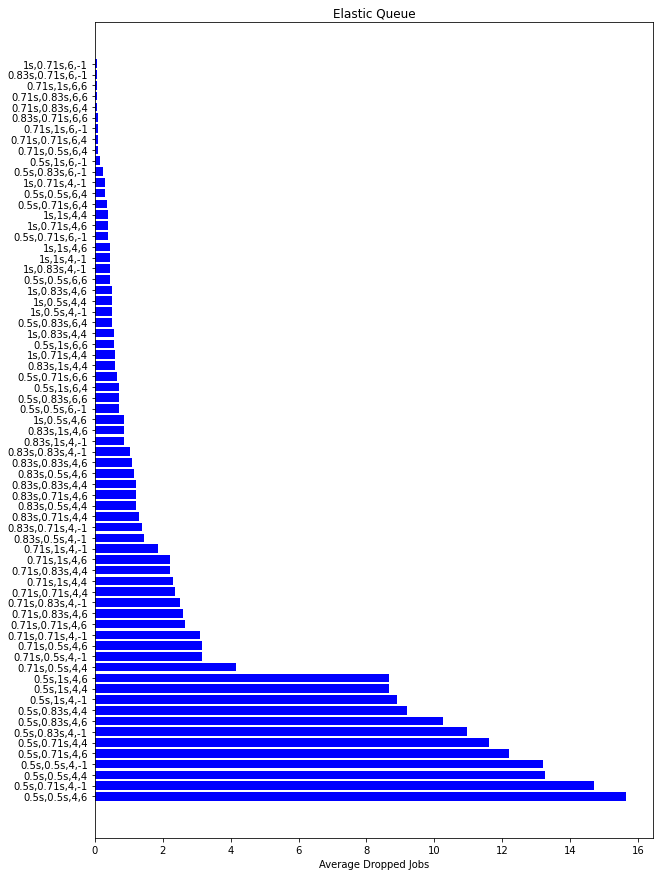

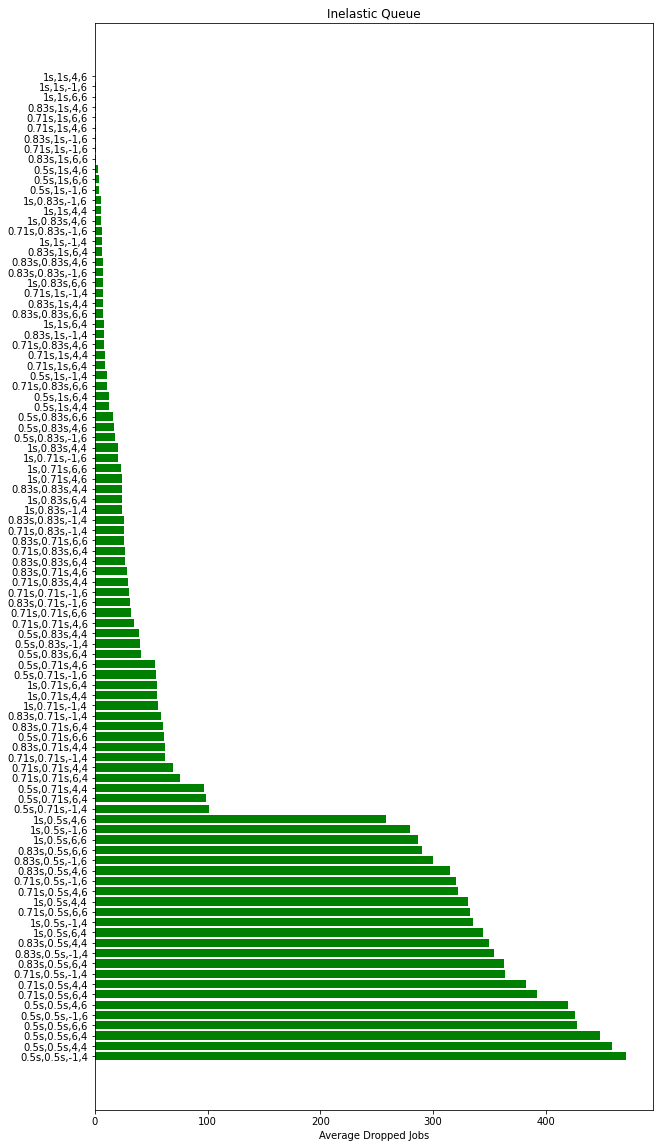

In [44]:
df1,df2 = QueueJobsDropped(json_data)
p1, p2 = AvgDroppedJobs(df1,df2)
plotDropped(p1,p2)


General-0.5s,0.5s,-1,-1.json|Rete.server|busy:timeavg: point estimate = 0.99875, 95% CI = (0.99874, 0.99877), variance = 0.00000
General-0.5s,0.5s,-1,4.json|Rete.server|busy:timeavg: point estimate = 0.96853, 95% CI = (0.96843, 0.96864), variance = 0.00006
General-0.5s,0.5s,-1,6.json|Rete.server|busy:timeavg: point estimate = 0.98645, 95% CI = (0.98638, 0.98651), variance = 0.00002
General-0.5s,0.5s,4,-1.json|Rete.server|busy:timeavg: point estimate = 0.99858, 95% CI = (0.99856, 0.99860), variance = 0.00000
General-0.5s,0.5s,4,4.json|Rete.server|busy:timeavg: point estimate = 0.96489, 95% CI = (0.96479, 0.96499), variance = 0.00005
General-0.5s,0.5s,4,6.json|Rete.server|busy:timeavg: point estimate = 0.98474, 95% CI = (0.98467, 0.98481), variance = 0.00003
General-0.5s,0.5s,6,-1.json|Rete.server|busy:timeavg: point estimate = 0.99903, 95% CI = (0.99901, 0.99904), variance = 0.00000
General-0.5s,0.5s,6,4.json|Rete.server|busy:timeavg: point estimate = 0.96424, 95% CI = (0.96416, 0.96433

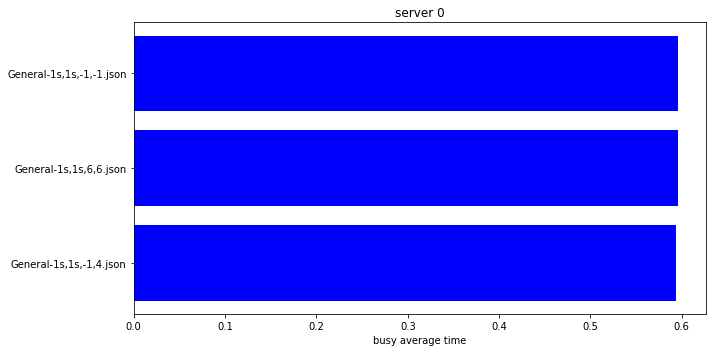

In [45]:
df1 = UseFact(json_data)
p1 = PointEstConfIntUseFact4(df1)
plotFactUse(p1)